# Dataset
##  Select a data set from the OpenML Machine Learning Repository 

(http://www.openml.org) with the
following requirements:<br>
a. minimum 1000 instances,<br>
b. minimum 20 attributes,<br>
c. minimum 4 class labels (for visualizing class distributions on the map).<br>
Alternatively, you can also<br>
 opt to create an artificial dataset, preferably via parameterized scripts (in Matlab, Java, R,<br>
Python…) similar to the 10-Gaussians dataset, creating data of different densities combining<br>
i. Data on a finite area of a 1-d (line), 2-d, 3-d, 5-d hyperplanes<br>
ii. Data on (hyper-)spheres with different radius as well as Gaussians<br>
iii. Linear data sets in different intertwined settings<br>
iv. Other cluster characteristics that you find interesting<br>

## Register the dataset you picked with your group number in the TUWEL Wiki.<br>
 You must make sure<br>
that your dataset is unique, i.e. no two groups may take the same data set! (first come, first serve -<br>
do it early to get a data set that you also find interesting to work.)<br>

## Create a machine-actionable description of the dataset following Croissant / Schema.org<br>
descriptions for datasets (c.f. Croissant: https://neurips.cc/virtual/2024/poster/97627,<br>
https://docs.mlcommons.org/croissant/docs/croissant-spec.html; schema.org:<br>
https://schema.org/Dataset, c.f. the JSON example provided at https://schema.org/Dataset#eg-0478)<br>

## Analyze and describe the characteristics of the dataset (size, attribute types as discussed in class,<br>
value ranges, sparsity, min/max values, outliers, missing values, correlations, ...), and describe this<br>
in the report. Also, describe any hypotheses you might have concerning the distribution of the data,<br>
number of clusters and their relationship, majority/minority classes.<br>

## Analyzing the dataset

The dataset we chose is related to the paper SisPorto 2.0: a program for automated analysis of cardiotocograms  (https://pubmed.ncbi.nlm.nih.gov/11132590/), which proposes a system to analyze cardiotocograms. 

A cardiotocogram (CTG) is the graphical representation produced during cardiotocography monitoring. 

Ayres de Campos et al. (2000) SisPorto 2.0 A Program for Automated Analysis of Cardiotocograms. J Matern Fetal Med 5:311-318

### Dataset description from the source
2126 fetal cardiotocograms (CTGs) were automatically processed and the respective diagnostic features measured. The CTGs were also classified by three expert obstetricians and a consensus classification label assigned to each of them. Classification was both with respect to a morphologic pattern (A, B, C. ...) and to a fetal state (N, S, P). Therefore the dataset can be used either for 10-class or 3-class experiments.


We will be using the morphologic patterns as the target classes to end up with a 10-class experiment.

### Cardiotography
Cardiotocography, also known as electronic fetal monitoring (EFM), is a medical technique used to monitor both the fetal heart rate and uterine contractions during pregnancy and labor.


### Feature descriptions:
Attribute Information:

- LB - FHR baseline (beats per minute)
- AC - # of accelerations per second
- FM - # of fetal movements per second
- UC - # of uterine contractions per second
- DL - # of light decelerations per second
- DS - # of severe decelerations per second
- DP - # of prolongued decelerations per second
- ASTV - percentage of time with abnormal short term variability
- MSTV - mean value of short term variability
- ALTV - percentage of time with abnormal long term variability
- MLTV - mean value of long term variability
- Width - width of FHR histogram
- Min - minimum of FHR histogram
- Max - Maximum of FHR histogram
- Nmax - # of histogram peaks
- Nzeros - # of histogram zeros
- Mode - histogram mode
- Mean - histogram mean
- Median - histogram median
- Variance - histogram variance
- Tendency - histogram tendency
- CLASS - FHR pattern class code (1 to 10)
- NSP - fetal state class code (N=normal; S=suspect; P=pathologic)

### Arff inaccuracies
The feature descriptions in the arff file don't exactly match, since the features are unnamed and there are more of them than described. Guesstimately, the class also got one-hot encoded



# Preprocessing: 

Get the data into the form needed for training SOMs. Describe your preprocessing<br>
steps (e.g. transcoding, scaling), why you did it and how you did it. Specifically, if your dataset turns<br>
out to be extremely large (very high-dimensional and huge number of vectors so that it does not fit<br>
into memory for training SOMs) you may choose to apply subsampling for the training data.<br>

In [1]:
## TODO LOADING AND PREPROCESSING THE DATA
from scipy.io import arff
import pandas as pd

data, meta = arff.loadarff('datasets/cardiotography/cardiotography.arff')

df = pd.DataFrame(data)

In [2]:

class_distribution = df['Class'].value_counts()
class_distribution_percentage = df['Class'].value_counts(normalize=True) * 100

# Combine both counts and percentages into one DataFrame
class_distribution_df = pd.DataFrame({
    'Count': class_distribution,
    'Percentage': class_distribution_percentage
})

print(class_distribution_df)

#print(meta)

#df.info()

#meta.names

       Count  Percentage
b'2'     579   27.234243
b'1'     384   18.062088
b'6'     332   15.616181
b'7'     252   11.853246
b'10'    197    9.266228
b'8'     107    5.032926
b'4'      81    3.809972
b'5'      72    3.386642
b'9'      69    3.245532
b'3'      53    2.492944


In [3]:
feature_names = [attr[0] for attr in meta.names()]  # Correctly extract attribute names
#print("\nFeature Names From Metadata:\n", feature_names)

In [4]:
df.describe()

V1           V2           V3           V4           V5  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean     25.122766   878.439793  1702.877234   133.303857   133.303857   
std      15.241753   894.084748   930.919143     9.840844     9.840844   
min       1.000000     0.000000   287.000000   106.000000   106.000000   
25%      10.000000    55.000000  1009.000000   126.000000   126.000000   
50%      29.000000   538.000000  1241.000000   133.000000   133.000000   
75%      39.000000  1521.000000  2434.750000   140.000000   140.000000   
max      48.000000  3296.000000  3599.000000   160.000000   160.000000   

                V6           V7           V8           V9          V10  ...  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  ...   
mean      2.722484     7.241298     3.659925    46.990122     1.332785  ...   
std       3.560850    37.125309     2.847094    17.192814     0.883241  ...   
min       0.000000     0.000000     0.000000    12.000000     0.200000  ...   
25%       0.000000     0.000000     1.000000    32.000000     0.700000  ...   
50%       1.000000     0.000000     3.000000    49.000000     1.200000  ...   
75%       4.000000     2.000000     5.000000    61.000000     1.700000  ...   
max      26.000000   564.000000    23.000000    87.000000     7.000000  ...   

               V26          V27          V28          V29          V30  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.180621     0.272342     0.024929     0.038100     0.033866   
std       0.384794     0.445270     0.155947     0.191482     0.180928   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               V31          V32          V33          V34          V35  
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  
mean      0.156162     0.118532     0.050329     0.032455     0.092662  
std       0.363094     0.323314     0.218675     0.177248     0.290027  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 35 columns]

In [5]:
feature_names = [
    "LB", "AC", "FM", "UC", "DL", "DS", "DP", "ASTV", "MSTV", "ALTV",
    "MLTV", "Width", "Min", "Max", "Nmax", "Nzeros", "Mode", "Mean",
    "Median", "Variance", "Tendency", "V22", "V23", "V24",
    "V25", "V26", "V27", "V28", "V29", "V30", "V31", "V32", "V33", "V34", "V35", "CLASS",
]
df.columns = feature_names

In [6]:
#standard preprocessing for the DataFrame 
def preprocess_data(df):
    # Drop rows with missing values
    df = df.dropna()
    # Drop duplicate rows
    df = df.drop_duplicates()
    # Drop columns with constant values
    df = df.loc[:, (df != df.iloc[0]).any()]
    #drop the columns that appear to just be one hot encoding for the class anyways and for the 3 class problem
    df.drop(columns=["V25","V26", "V27", "V28", "V29", "V30", "V31", "V32", "V33", "V34", "V35"], inplace=True)
    return df   

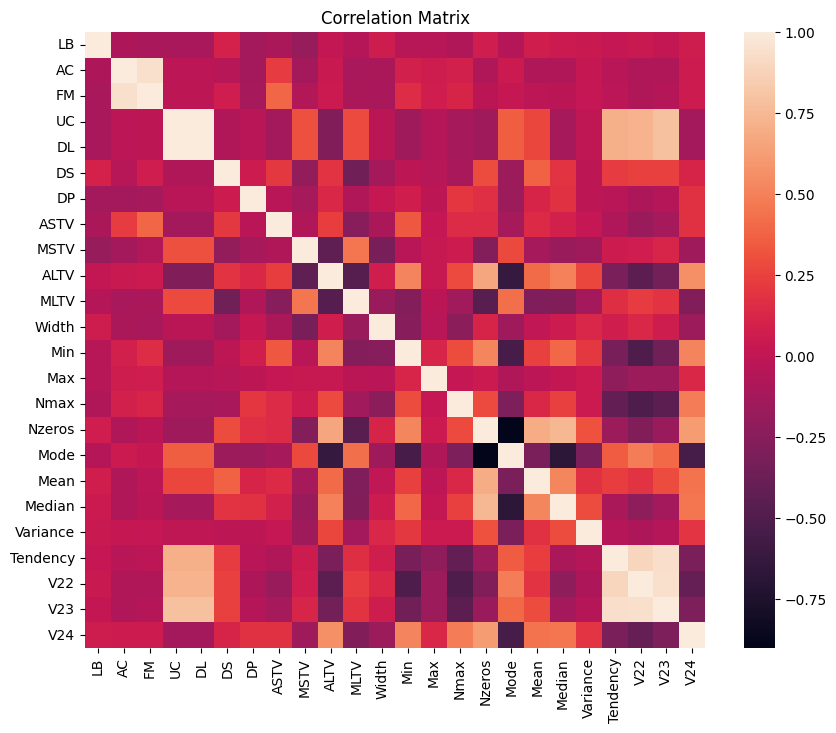

In [7]:
df = preprocess_data(df)
#df.info()
import matplotlib.pyplot as plt
import seaborn as sns
def get_corr_matrix(df):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.corr(),)
    plt.title("Correlation Matrix")
    plt.show()

get_corr_matrix(df)
#print(df["Class"].value_counts())

# C) SOM Training and Analysis

## 1) Train a reasonably sized „regular“ SOM

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
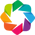

In [8]:
from minisom import MiniSom
from sklearn.datasets import load_iris
import numpy as np
from pysomvis import PySOMVis
import pandas as pd
from scipy.io import arff
def calculate_som_size(data_size, fraction=0.1):
    """Calculate SOM dimensions based on the dataset size."""
    # Calculate the total number of units based on the data size and fraction
    total_units = int(data_size * fraction)
    # Use the square root to determine SOM dimensions (assumes a square grid)
    som_dim = int(np.sqrt(total_units))
    return som_dim, som_dim

def train_som(dataloader, **params):
    """
    Train a Self-Organizing Map (SOM) with specified parameters.

    Parameters:
    - dataloader (function): A function that returns the dataset. The dataset should have 
      'data' (features) and 'target' (labels) attributes.
    - size_fraction (float): Fraction of the dataset used to calculate the SOM size (default is 0.1).
    - sigma (float): The neighborhood radius used for the SOM (default is 1.0). Controls how far 
      neighboring neurons will be affected by the learning process.
    - learning_rate (float): The learning rate for the SOM (default is 0.5). It determines how 
      much the weights of the SOM are adjusted during training.
    - num_iterations (int): The number of iterations to train the SOM (default is 1000).
    - random_seed (int, optional): The random seed for initializing the SOM. If None, a random seed is used.
      Providing a fixed value ensures reproducibility.
    - neighborhood_function (str): The type of neighborhood function used for training ('gaussian' is default).
      This determines the shape of the neighborhood that is affected during training.

    Returns:
    - som (MiniSom): The trained SOM object.
    - X (array): The input features used for training.
    - y (array): The target labels corresponding to the input features.
    - class_names (array): The class names of the target labels.
    """
    
    # Load dataset using the provided dataloader function
    data = dataloader()
    X = data.data  # Extract the data (already normalized by the dataloader)
    y = data.target
    class_names = data.target_names

    # Calculate SOM size based on the number of data points and specified fraction
    som_x, som_y = calculate_som_size(len(X), fraction=params.get('size_fraction', 0.1))

    # Get the dimensionality of the input data (number of features per data point)
    input_len = X.shape[1]

    # Initialize SOM with the calculated dimensions and other specified parameters
    som = MiniSom(som_x, som_y, input_len, 
                  sigma=params.get('sigma', 1.0),  # Neighborhood radius
                  learning_rate=params.get('learning_rate', 0.5),  # Learning rate
                  neighborhood_function=params.get('neighborhood_function', 'gaussian'),  # Neighborhood function
                  random_seed=params.get('random_seed', None))  # Random seed for initialization

    # Train the SOM using the normalized data and specified number of iterations
    som.train(X, params.get('num_iterations', 1000))

    # Return trained SOM and the input data
    return som, X, y, class_names

def iris_dataloader():
    """Load and normalize Iris dataset."""
    data = load_iris()
    # Normalize data to range [0, 1]
    data.data = (data.data - data.data.min(axis=0)) / (data.data.max(axis=0) - data.data.min(axis=0))
    return data

def cardiotography_dataloader():
    """Load and normalize Cardiotography dataset."""
    data, meta = arff.loadarff('datasets/cardiotography/cardiotography.arff')
    df = pd.DataFrame(data)


    df = preprocess_data(df)
    #split df into data and target
    data = df.iloc[:, :-1].values
    target = df.iloc[:, -1].values
    target = target.astype(int)
    target = target - 1
    
    
    # Normalize data to range [0, 1]
    #df = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    #normalize only the data columns min max scaling
    #data = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    #scale using z score scaling
    data = (data - data.mean(axis=0)) / (data.std(axis=0) + 1e-8)

  
    if np.isnan(data).any():
        raise ValueError("NaN values detected in the dataset after normalization.")
    
    class Data():
        def __init__(self, data, target):
            self.data = data
            self.target = target
            self.target_names = np.array(df.columns)
    
    # data are columns from 0 except the last one
    # target is the last column
    return Data(data, target)




def calculate_som_metadata(som, X, y, class_names, compact_output = True):
  
    metadata = {}

    # 1. Quantization Error
    metadata['quantization_error'] = som.quantization_error(X)

    # 2. Topographic Error
    metadata['topographic_error'] = som.topographic_error(X)

    # 3. Best Matching Units (BMUs)
    metadata['bmus'] = [som.winner(x) for x in X]
    metadata['bmu_indices'] = [np.ravel_multi_index(bmu, som.get_weights().shape[:2]) for bmu in metadata['bmus']]

    # 4. Neuron Weights
    metadata['neuron_weights'] = som.get_weights()

    # 5. Node Counts (Hit Map)
    metadata['node_counts'] = np.zeros(som.get_weights().shape[:2], dtype=int)
    for bmu in metadata['bmus']:
        metadata['node_counts'][bmu] += 1
 

    if compact_output:
        print("--- SOM Metadata ---")
        print(f"Quantization Error: {metadata['quantization_error']:.4f}")
        print(f"Topographic Error:  {metadata['topographic_error']:.4f}")

        return None
    else:
        return metadata

    
    

Train a SOM with „regular“ size (i.e. number of units as a certain fraction of the number of data<br>
items) and reasonable training parameters (sufficiently large initial neighborhood, learning<br>
rate; provide a justification for the selection of the parameters. NOTE: Learning rates for SOMs<br>
differ from those usually encountered in Deep Neural Networks, c.f. lecture)<br>

In [9]:
# TODO TRAIN SOM WITH REG SIZE

params = {
    'size_fraction': 0.4,
    'sigma': 1.5,
    'learning_rate': 0.3,
    'num_iterations': 5000,
    'random_seed': 42  # Specify a random seed for initialization
}

som, X, y, class_names = train_som(cardiotography_dataloader, **params)

Analyse in detail the class distribution, cluster structure, quantization errors, topology
violations.<br> a) Can you identify the border effect and magnification factors.<br> b) How well do class
distribution and cluster structure match?<br> c) Which classes fall into sub-clusters, which classes
are split across clusters, which classes mix in clusters.<br> d) How is the quantization error
distributed on the map, how does this correspond with perceived cluster separation and
quality?

In [10]:
calculate_som_metadata(som, X, y, class_names)

--- SOM Metadata ---
Quantization Error: 1.7157
Topographic Error:  0.1608


In [11]:
#TODO above
weights = {
    'arr': som.get_weights(),
    'xdim': som._weights.shape[0],
    'ydim': som._weights.shape[1],
    'vec_dim': som._weights.shape[2]
}

print(som.quantization_error(X))
vis = PySOMVis(weights=som._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
vis._mainview



1.7157397424283856


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

SDH (70) to answer question a - c

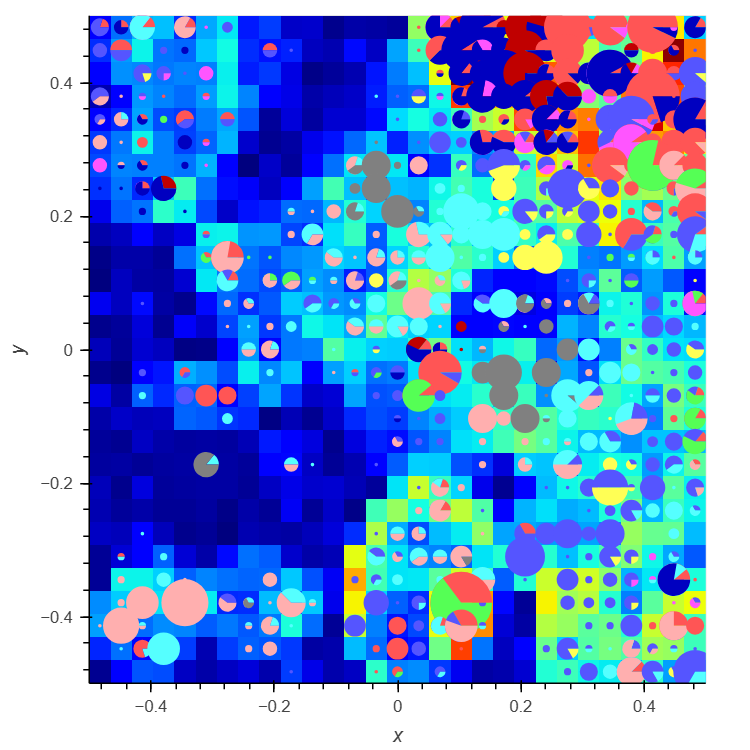


Quantization error of the SOM (d)

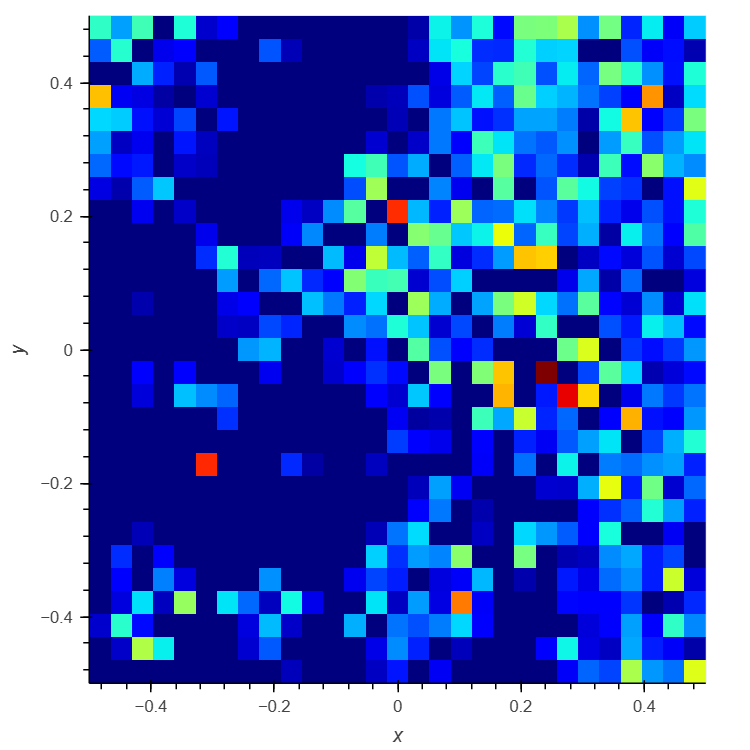

**Describe and compare the structures found**(providing detailed info on visualizations and
parameters)

a) Can you identify the border effect and magnification factors
Yes from the SDH with a high smoothing factor some clusters form on the borders. Also with Pie charts overlayed we can see some well defined clusters. Magnification wise we can see the densest place on the top right with also more space devoted to them.

b) How well do class distribution and cluster structure match?
The class distribution highly imbalanced where more than 71% of the full data is from only 4 classes. From the SDH we can at least see 2-3 clusters.
Looking at thhe pie chart we can see that for the four majority classes (2,1,6,7) some cluster emerge.

c) Which classes fall into sub-clusters, which classes are split across clusters, which classes mix in clusters.
Looking at the d matrix with the pie chart overlay we can see that many classes mix across cluusteers. E.g. in the top right classes 1,10,9 all mix together. But for some classes like 7 and 8 some disticnt clusters can be observed. Class 8 is even split acorss two clusters.

d) How is the quantization error distributed on the map, how does this correspond with perceived cluster separation and quality?
The quantization error is relatively evenly distributed on the whole map and fairly high (1.7). This means its not well fit to input data.








In [12]:
#TODO show structres

#TODO comparision text

## 2) Analyze different initializations of the SOM

Train one further „regular-sized“ SOM using the same training parameters as above, but using
a different random seed for initializing the SOM.

In [13]:
params["random_seed"] = 43

# Train the SOM using the updated parameters (same dataset, different seed)
som2, X, y, class_names = train_som(cardiotography_dataloader, **params)


**Show and describe** <br> a) how the cluster structures and class distributions shift on the two
SOMs,<br> b) the effect on topology violations, cluster relationships, etc.<br> c) Which clusters show
a stable relationship, which ones change their relative position?<br> d) Which data instances are
stably mapped with similar data instances, which change a lot? Are they part of the same
clusters?

In [14]:
# Visualize the first SOM (som)
vis1 = PySOMVis(weights=som._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som, X, y, class_names)
vis1._mainview


--- SOM Metadata ---
Quantization Error: 1.7157
Topographic Error:  0.1608


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [15]:

# Visualize the second SOM (som2) with a different random seed
vis2 = PySOMVis(weights=som2._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som2, X, y, class_names)
vis2._mainview

--- SOM Metadata ---
Quantization Error: 1.6873
Topographic Error:  0.1291


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [16]:
som2.quantization_error(X)

1.6873370774450434

Umatrix with pie chart overlay question a

seed 1 som
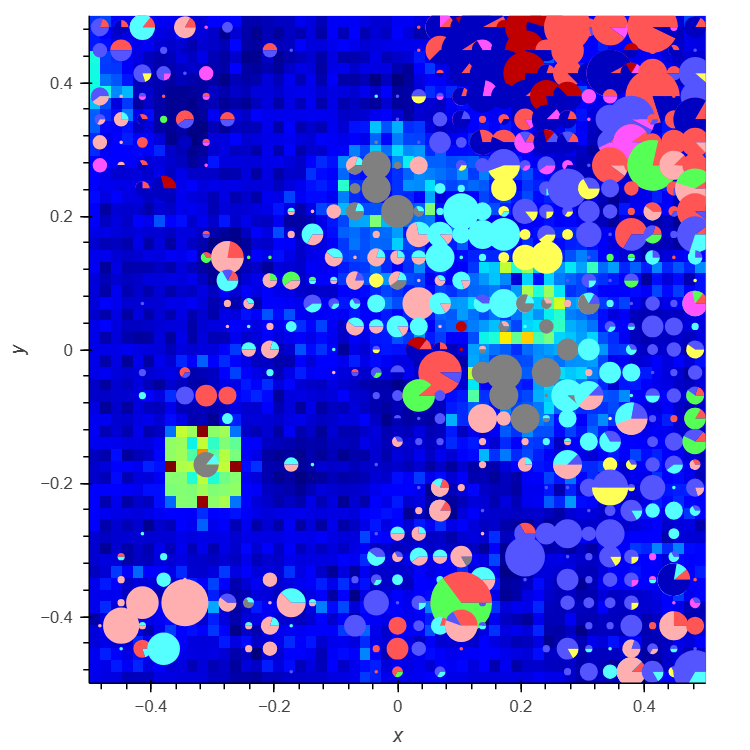
seed 2 som
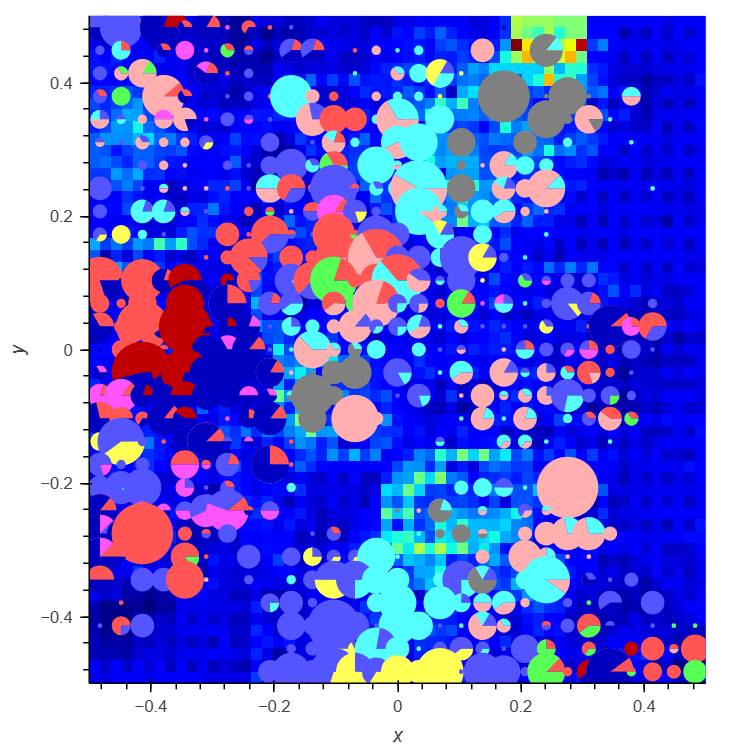

Neighborhood graph overlayed on u matrix for k=1 to answer question b
seed 1

![2_b_v1_topology_violation_r1_3 (2).png](<attachment:2_b_v1_topology_violation_r1_3 (2).png>)

seed 2

![2_b_v2_topology_violation_r1_3 (3).png](<attachment:2_b_v2_topology_violation_r1_3 (3).png>)

**Describe and compare the structures found** (providing detailed info on visualizations and
parameters)

a) how the cluster structures and class distributions shift on the two SOMs

The depicted cluster boarders inside the U-Matrix are visible across both but are in other places. So in enssence the map fits to the data in similar mannars. The quntanization error for the second map is a bit lower which could indicate a better fit. Again with Umatrix alone its hard to identify true clusters.

b) the effect on topology violations, cluster relationships, etc.
The topographic error between between vis1 and vis 2 is 0.4 lower which inidicates a better topology conservation. The Neighborhood graph for both graphs have very long lines which shows significant topology violations in both.

c) Which clusters show a stable relationship, which ones change their relative position?
From the both umatrix with pie overlaied visualizations we can se almost all clusters changed their relative position.

d)Which data instances are stably mapped with similar data instances, which change a lot? Are they part of the same clusters?
From the same charts. Class 6,4,2 share boarders in both. Mapping of class 7 changed. Classes 10,9,1 also clumped together in both.

## 3) Analyze different map sizes

Train 2 additional SOMs varying the size (very small / very large) (provide reasons for choice
of sizes)<br>
Train each map with rather large neighborhood radius and high learning rate (provide reasons
for the definition of „high“!)

In [17]:
# Train a very small SOM (small grid, less resolution)
params_small = {
    'size_fraction': 0.1,  # Very small grid size (5% of the data size)
    'sigma': 3,  # Large neighborhood radius (larger value for more smoothing)
    'learning_rate': 1.5,  # High learning rate (close to 1 for fast convergence)
    'num_iterations': 10000,
    'random_seed': 44  # Different seed for initialization
}
som_small, X, y, class_names = train_som(cardiotography_dataloader, **params_small)

# Train a very large SOM (large grid, higher resolution)
params_large = {
    'size_fraction': 1.5,  # Very large grid size (100% of the data size)
    'sigma':3 ,  # Large neighborhood radius (larger value for more smoothing)
    'learning_rate': 1.5,  # High learning rate (close to 1 for fast convergence)
    'num_iterations': 10000,
    'random_seed': 45  # Different seed for initialization
}
som_large, X, y, class_names = train_som(cardiotography_dataloader, **params_large)




Analyse in detail the<br> a) class distribution,<br> b) cluster structure,<br> c) quantization errors,<br> d)
topology violations. Also,<br> e) analyze how clusters shift, change in relative size, and how their
relative position to each other changes or remains the same.<br> f) Check for aspects such as
magnification factors. What is the resulting granularity of clusters visible on the small and large
maps? Are the same clusters visible in the very large map as in the regular map?

In [18]:

# Visualize the very small SOM
vis_small = PySOMVis(weights=som_small._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som_small, X, y, class_names)
vis_small._mainview




--- SOM Metadata ---
Quantization Error: 3.1385
Topographic Error:  0.2898


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [19]:
# Visualize the very large SOM
vis_large = PySOMVis(weights=som_large._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som_large, X, y, class_names)
vis_large._mainview

--- SOM Metadata ---
Quantization Error: 1.2321
Topographic Error:  0.0681


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

U matrix with pie chart overlay for a-b

small map

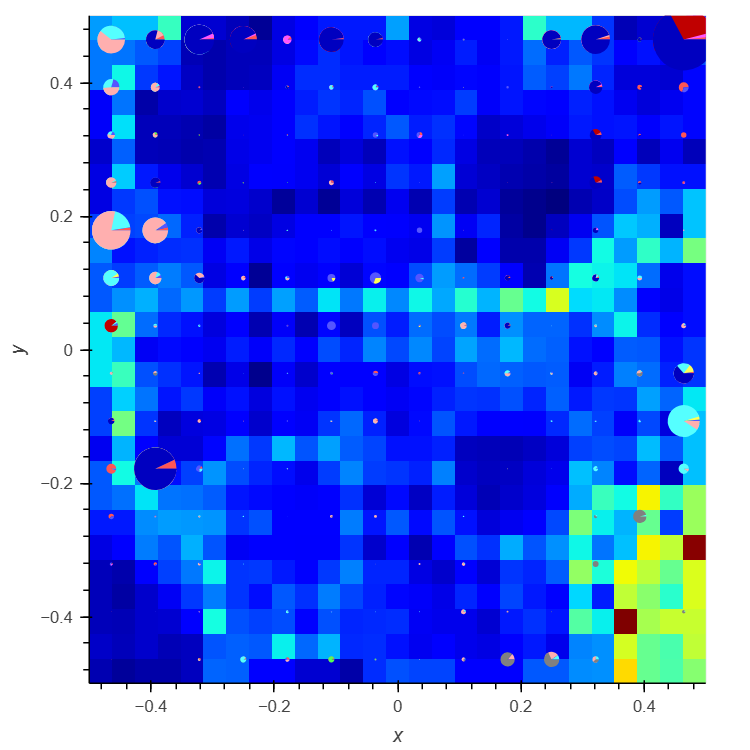

big map

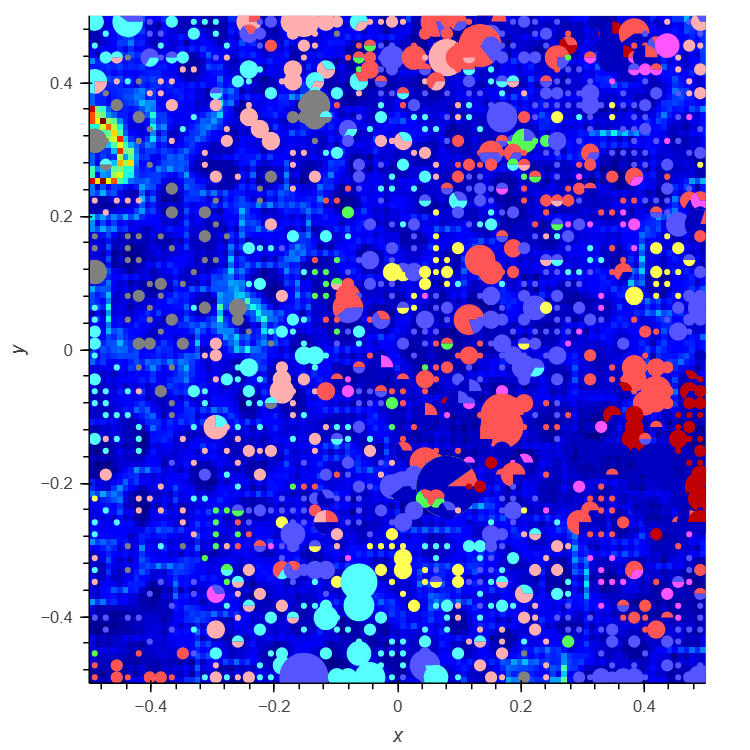

Chess board visualization for small and big map

small map

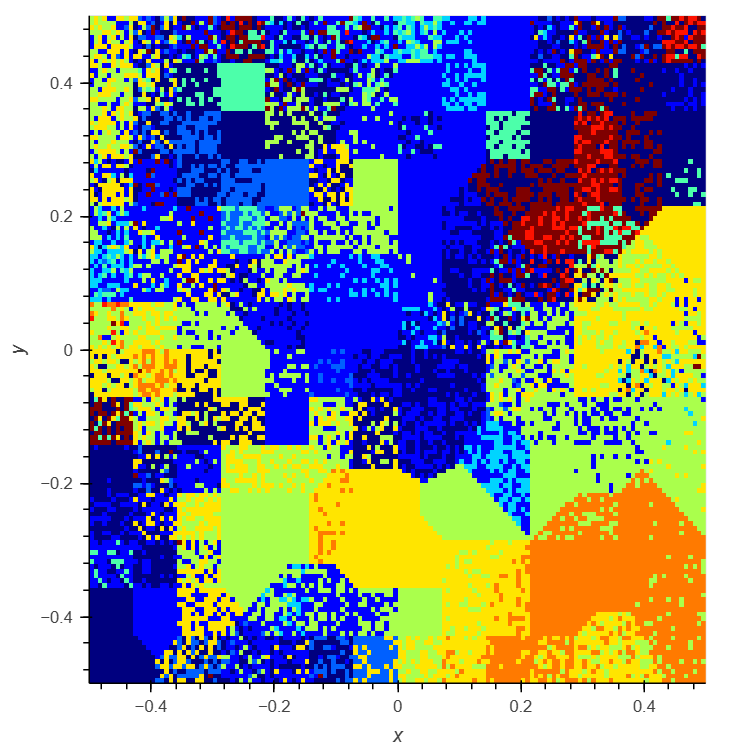

big map

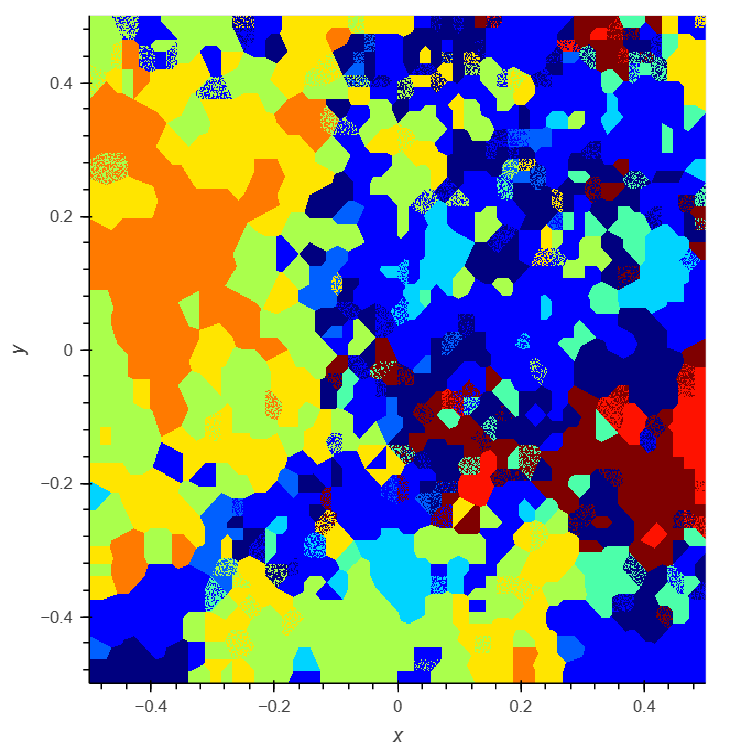

**Describe and compare the structures found** (providing detailed info on visualizations and
parameters)

Learning rate of 1.5 is higher than typical values (usually between 0.1 to 0.5), making it likely to cause large weight adjustments that might lead to overshooting, poor convergence, or instability in the map training process.<br>

The size of the som was chosen as a fraction of 0.1 of the input data length and 1.5 of the input data length. This gives us to extremas in map size. <br>


a) class distribution,<br>
For the smaller map the class imbalance and therefore distribution is a bigger burden. The clusters have mixed class distribution. (High bias) <br>
For the big map very deailed clusters for each class.<br>
On both classes are distributed all over the map.<br>
b) cluster structure,<br>
For the small map small number of big clusters with not unique classes inside. <br>
For the big map many small clusters with mostly.<br>
See U map with pie.<br>
c) quantization errors,<br>
For the small as expected very big. Not enought neurons to stretch across full data space. <br>
For the big one very small as expected. Enough neurons to get close to each input data. <br>
d) topology violations.<br>
Topographic Error decreases from 0.28 to 0.06 from small to big. <br>
Neighborhood graph on both still shows quite high topographical error since the lines are still very long.<br>
This is probalby amplified by the high learning rate and high neighborhood radius. <br>
e) analyze how clusters shift, change in relative size, and how their relative position to each other changes or remains the same.<br>
This one big cluster from the small map can also be seen in the big one. Overall the cluster size gets smaller the bigger the map gets. On the big map the clusters are distributed all over the map. <br>
f) Check for aspects such as magnification factors. What is the resulting granularity of clusters visible on the small and large maps? <br>
Big map ->high granularity <br>
small map ->low granularity<br>
Are the same clusters visible in the very large map as in the regular map? <br>
Yes and No. E.g. the class 9/10 cluster is visible in both maps, but differently streched. <br>
Some cluster dont show up as displayed in the reguular one.


# Comparison
Comparing the small to the large SOM, we can clearly see more distinct (though still connected) cluster regions emerging in the large, 1.0x SOM. 


## 4) Analyze different initial neighborhood radius settings

Train the very large SOM as specified above, but with a much too small neighborhood radius.

In [20]:


params_large_small_neighborhood = {
    'size_fraction': 1.0,  # Very large grid size (100% of the data size)
    'sigma': 0.1,  # Large neighborhood radius (larger value for more smoothing)
    'learning_rate': 0.9,  # High learning rate (close to 1 for fast convergence)
    'num_iterations': 10000,
    'random_seed': 45  # Different seed for initialization
}

som_small_neighborhood, X, y, class_names = train_som(cardiotography_dataloader, **params_large_small_neighborhood)

Analyse the<br> a) cluster structure,<br> b) quantization errors,<br> c) topology violations.<br> d) In how far
does this map differ from the very large map trained with a correct/high initial neighborhood
radius?

In [21]:
# Visualize the SOM with a small neighborhood radius
vis_small_neighborhood = PySOMVis(weights=som_small_neighborhood._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som_small_neighborhood, X, y, class_names)
vis_small_neighborhood._mainview

--- SOM Metadata ---
Quantization Error: 1.8279
Topographic Error:  0.9962


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

U Matrix a

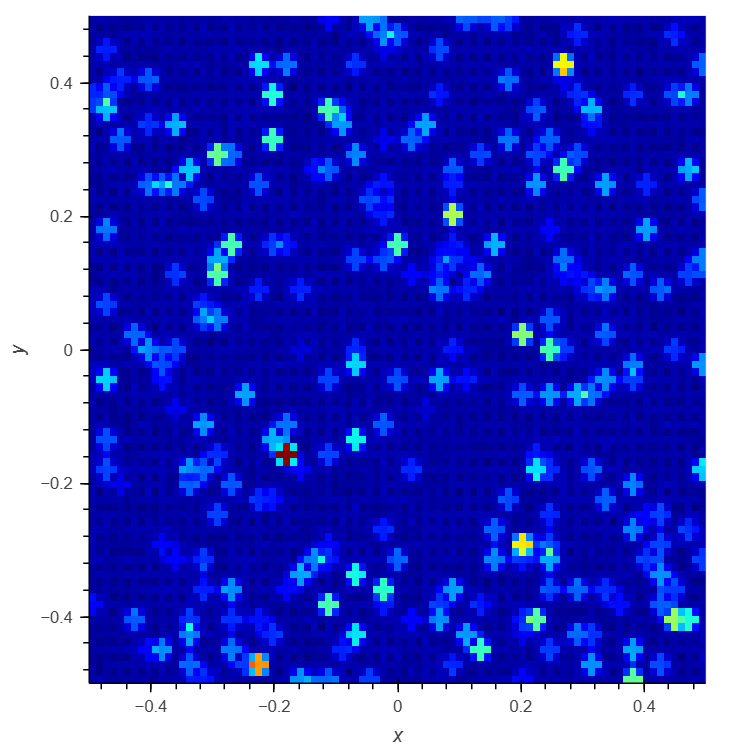



Quantization error b

![4_quant_error__c (1).png](<attachment:4_quant_error__c (1).png>)

Neighborhood graph c

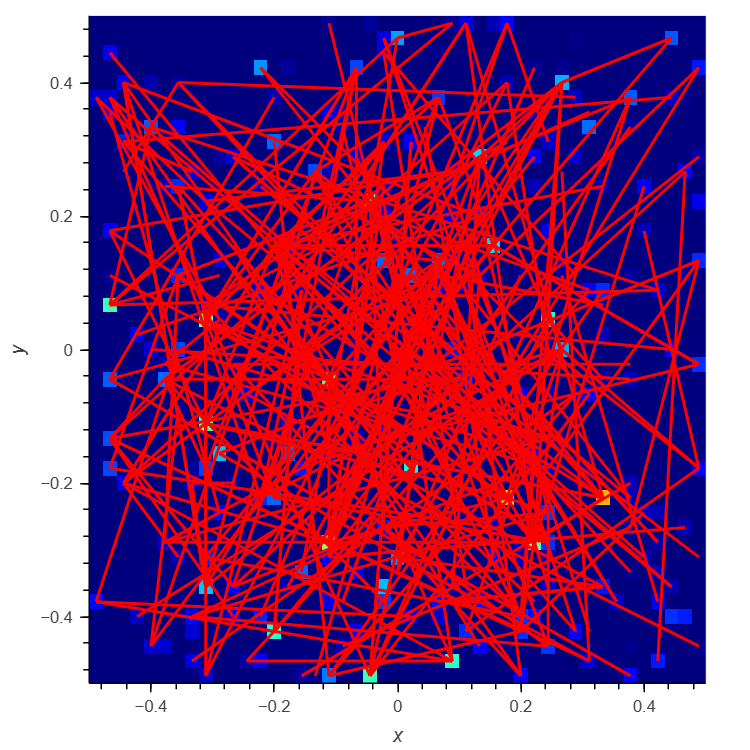

**Describe and compare the structures found** (what is the effect of a „too small“
neighborhood radius? How to detect it?)

A too small neighborhood radius could be detect by too many small clusters/cluster borders in the U-matrix. <br>
a) cluster structure,<br>
Very small clusters if at all present.<br>
b) quantization errors,
Relatively high quantization error. Distributed to only a few selected units.<br>
c) topology violations.<br>
Relative high Topographic Error. Also in kneighborhood graph spanning all over the map.<br>

d) In how far does this map differ from the very large map trained with a correct/high initial neighborhood radius?
Almost no clusters form.<br>

## 5) Analyze different initial learning rates

Train the regular-sized SOM as specified above, but with a (I) much too large / (II) much too<br>
small learning rate (provide justification for the setting of the parameter)

In [47]:
param_som_low_learning_rate = {
    'size_fraction': 0.5,
    'sigma': 1.0,
    'learning_rate': 0.01,  # Low learning rate
    'num_iterations': 15000,
    'random_seed': 47
}

som_low_learning_rate, X, y, class_names = train_som(cardiotography_dataloader, **param_som_low_learning_rate)

param_som_large_learning_rate = {
    'size_fraction': 0.5,
    'sigma': 1.0,
    'learning_rate': 5,  # High learning rate
    'num_iterations': 15000,
    'random_seed': 47
}

som_large_learning_rate, X, y, class_names = train_som(cardiotography_dataloader, **param_som_large_learning_rate)

Analyse for both (I) and (II)<br> a) cluster structure,<br> b) quantization errors,<br> c) topology violations.<br>
d) In how far do these two maps differ from the well-trained map analyzed above?

In [48]:
# Visualize the SOM with a low learning rate
vis_low_learning_rate = PySOMVis(weights=som_low_learning_rate._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som_low_learning_rate, X, y, class_names)
vis_low_learning_rate._mainview

--- SOM Metadata ---
Quantization Error: 2.6883
Topographic Error:  0.2979


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [49]:
# Visualize the SOM with a high learning rate
vis_large_learning_rate = PySOMVis(weights=som_large_learning_rate._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
calculate_som_metadata(som_large_learning_rate, X, y, class_names)
vis_large_learning_rate._mainview

--- SOM Metadata ---
Quantization Error: 1.6417
Topographic Error:  0.8303


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

U matrix of both to answer a and d

low learning rate

![5_low_learning rat__U.png](<attachment:5_low_learning rat__U.png>)

large learning rate

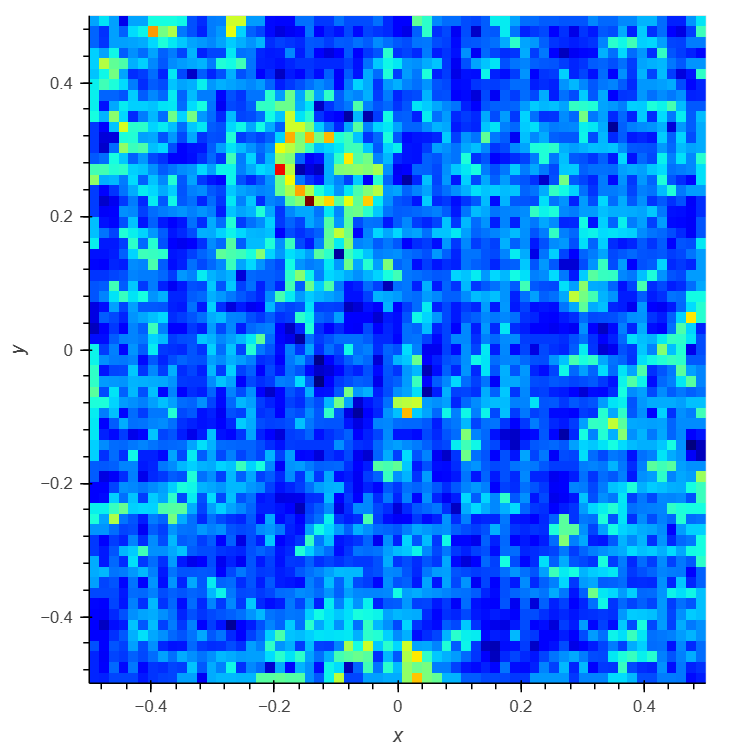
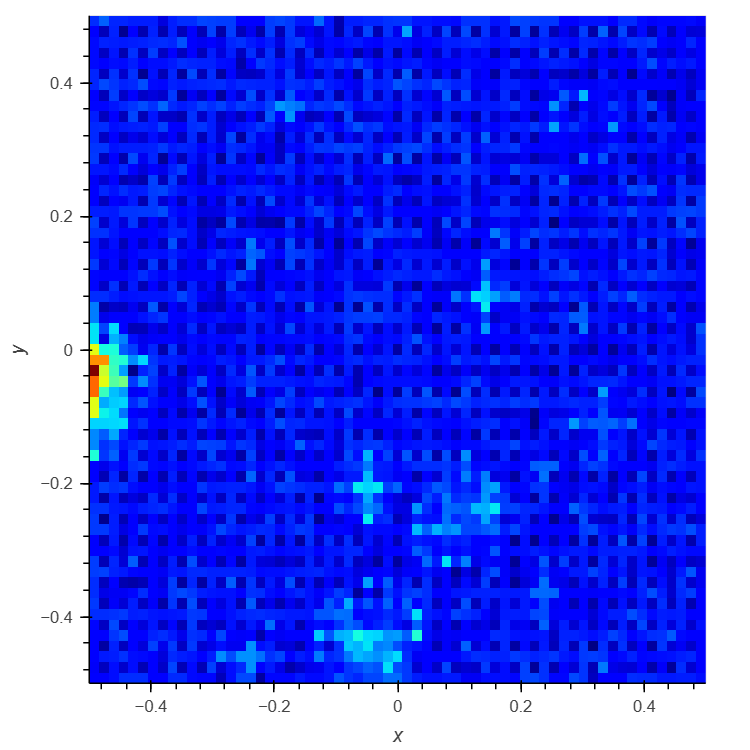

neighborhood graph overlayed on u matrix to answer c


low learning rate

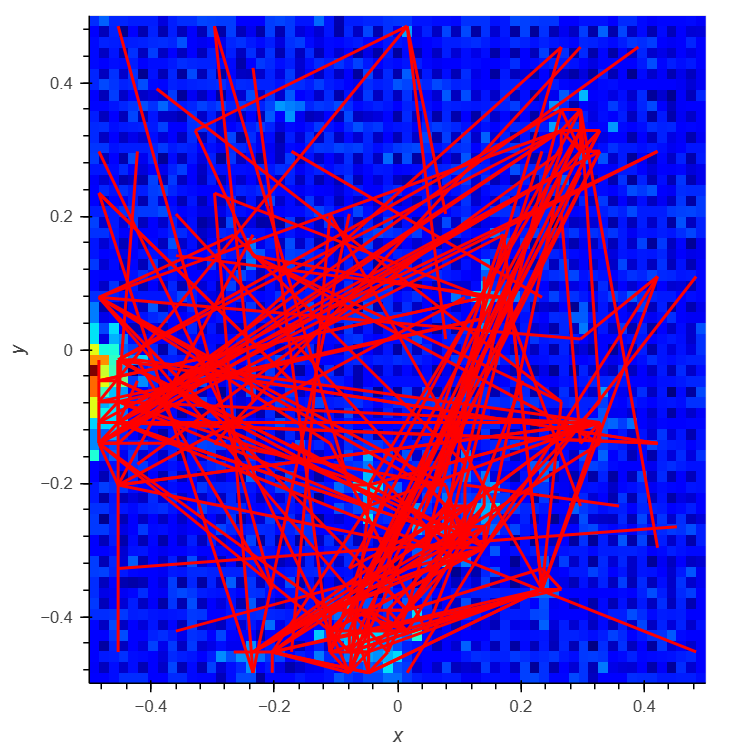

large learning rate

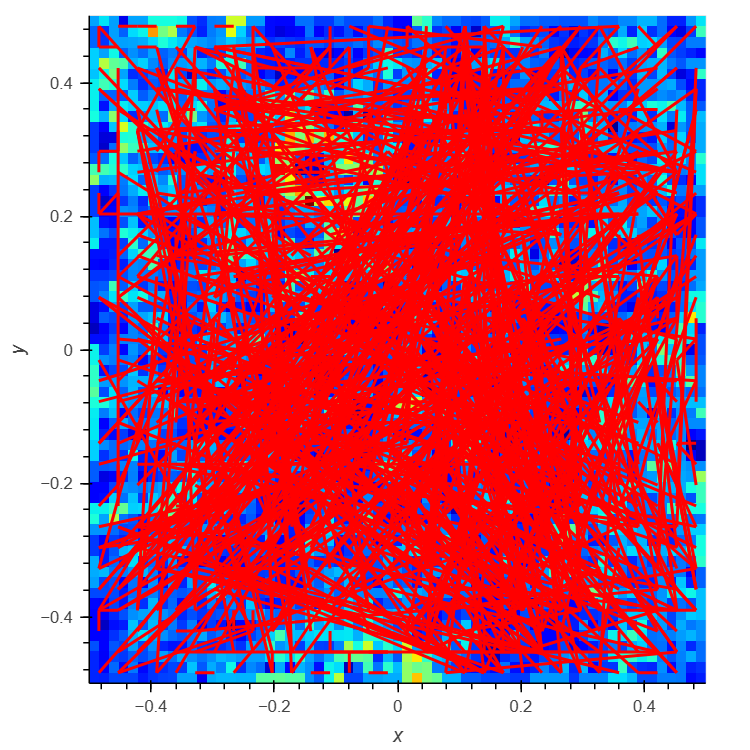

Describe and compare the structures found (how can you detect „too small“ learning<br>
rates? When do they start to make sense?

a) cluster structure,<br>
The low learning rate does not find the optimal map and displays only some clusture structure. <br>
The high learning rate overshoots mostly and creates almost no cluster structure. This can also be seen that the distance between all units is relatively high (U-matrix). <br>
b) quantization errors,
The quantization error is high on both. On the lower learning rate even higher. This could since the map cannot adapt fast enough and reach learn the full structure. <br>
c) topology violations.<br>
From both neighborhood graphs it can be seen that topology violations are still rampant on both.<br>
d) In how far do these two maps differ from the well-trained map analyzed above?<br>
High quantizaion error. Low cluster emergence. Overall the maps dont capture the underlying data well. <br>

#todo comparision text

## 6) Analyze different max iterations

Train a regular SOM using 2, 5, 10, 50, 100, 1000, 5000, 10000 iterations

In [26]:
iterations = [2,5,10,50,100,1000,5000,10000]

params_iterations = {
    'size_fraction': 0.5,
    'sigma': 1.0,
    'learning_rate': 0.5,
    'random_seed': 49
}

trained_soms = []

for x in iterations:
    som, X, y, class_names = train_som(cardiotography_dataloader, num_iterations=x, **params_iterations)
    
    trained_soms.append((som, X, y, class_names,x))
    

Analyse cluster structure. <br>a) When do cluster structures start to emerge?<br> b) After how many
iterations do they stabilize?<br> c) How can you tell from the quality measures whether the map is
stable?<br> d) Which visualizations help you discover not-yet stable SOM mappings?

In [27]:
# visualize first som
print(f"Iterations = {trained_soms[0][4]}")
vis_iterations = PySOMVis(weights=trained_soms[0][0]._weights, input_data=trained_soms[0][1],classes=trained_soms[0][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 2


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [28]:
# visualize second som
print(f"Iterations = {trained_soms[1][4]}")
vis_iterations = PySOMVis(weights=trained_soms[1][0]._weights, input_data=trained_soms[1][1],classes=trained_soms[1][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 5


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [29]:
# visualize third som
print(f"Iterations = {trained_soms[2][4]}")
vis_iterations = PySOMVis(weights=trained_soms[2][0]._weights, input_data=trained_soms[2][1],classes=trained_soms[2][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview


Iterations = 10


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [30]:
# visualize fourth som
print(f"Iterations = {trained_soms[3][4]}")
vis_iterations = PySOMVis(weights=trained_soms[3][0]._weights, input_data=trained_soms[3][1],classes=trained_soms[3][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 50


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [31]:
# visualize fifth som
print(f"Iterations = {trained_soms[4][4]}")
vis_iterations = PySOMVis(weights=trained_soms[4][0]._weights, input_data=trained_soms[4][1],classes=trained_soms[4][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview


Iterations = 100


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [32]:
#visualize sixth som
print(f"Iterations = {trained_soms[5][4]}")
vis_iterations = PySOMVis(weights=trained_soms[5][0]._weights, input_data=trained_soms[5][1],classes=trained_soms[5][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 1000


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [33]:
#visualize seventh som
print(f"Iterations = {trained_soms[6][4]}")
vis_iterations = PySOMVis(weights=trained_soms[6][0]._weights, input_data=trained_soms[6][1],classes=trained_soms[6][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 5000


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

In [34]:
#visualize eighth som
print(f"Iterations = {trained_soms[7][4]}")
vis_iterations = PySOMVis(weights=trained_soms[7][0]._weights, input_data=trained_soms[7][1],classes=trained_soms[7][2],classes_names = [str(t) for t in range(1, 11)])
vis_iterations._mainview

Iterations = 10000


Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

Describe and compare the structures found (how can you detect „too small“ learning
rates? When do they start to make sense?

In [35]:
#TODO maybe show structures

#todo comparision text

## 7) Detailed analysis of an „Optimal SOM“

Train a SOM using what you consider to be „optimal parameters“ based on sub-tasks 1-6.

In [36]:
optimal_params = {
    'size_fraction': 0.6,
    'sigma': 1.5,
    'learning_rate': 0.5,
    'num_iterations': 10000,
    'random_seed': 50
}

# Train the SOM with the optimal parameters
som_optimal, X, y, class_names = train_som(cardiotography_dataloader, **optimal_params)

# Visualize the SOM with the optimal parameters
vis_optimal = PySOMVis(weights=som_optimal._weights, input_data=X,classes=y,classes_names = [str(t) for t in range(1, 11)])
vis_optimal._mainview

Column
    [0] Column
        [0] Column
            [0] Row(margin=5, width=700)
                [0] StaticText(value='<b></b>')
                [1] Select(options=OrderedDict([('Component P...]), value=0)
                [2] Select(options=OrderedDict([('PiYG', ...]), value='jet')
                [3] Button(name='↶')
                [4] Button(name='↷')
                [5] Button(name='↔')
                [6] Button(name='↕')
                [7] Checkbox(name='interpolation')
        [1] Row
            [0] Column
                [0] HoloViews(DynamicMap)
            [1] Row
                [0] Column
                    [0] Column(margin=5, name='Component Planes', width=300)
                        [0] StaticText(value='<b>Component Planes</b>')
                        [1] IntSlider(end=23, name='Component')
                    [1] Str(str)
    [1] Column
        [0] Row()

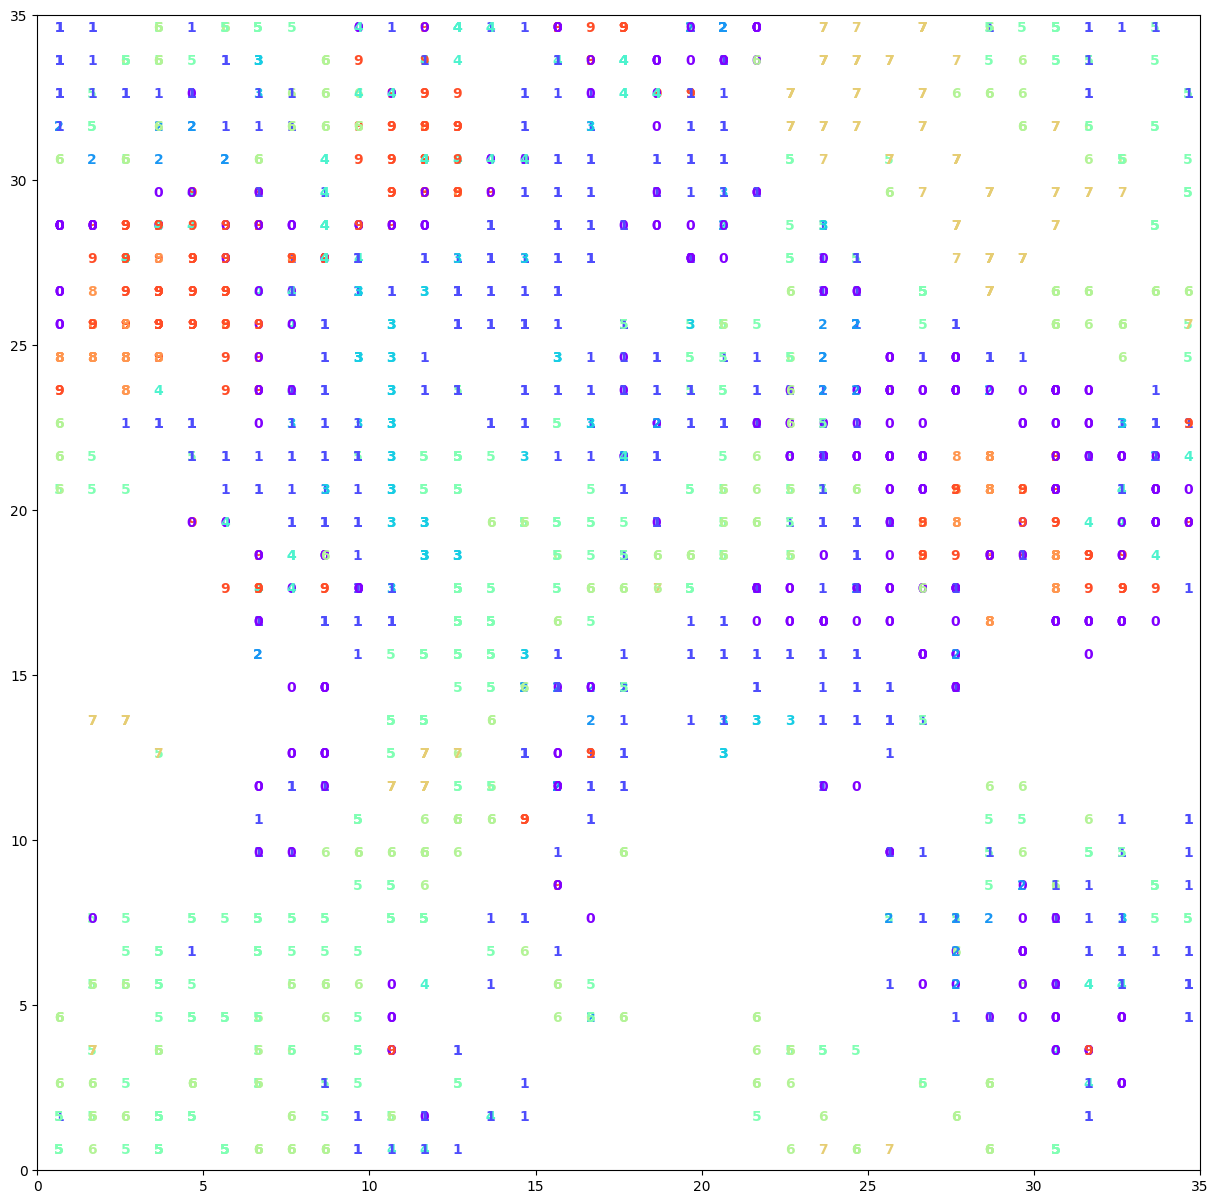

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
dataset = cardiotography_dataloader()
data = dataset.data
num = dataset.target

wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som_optimal.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 10})
    im = im + 1
plt.axis([0, som_optimal.get_weights().shape[0], 0,  som_optimal.get_weights().shape[1]])
#plt.savefig('resulting_images/som_digts.png')
plt.show()

Describe the final model following the FAIR4ML schema (cf.
https://doi.org/10.5281/zenodo.14002310, https://rda-fair4ml.github.io/FAIR4MLschema/
release/0.1.0/index.html, https://github.com/RDA-FAIR4ML/FAIR4ML-schema)

#todo above

# Diagram reference: 
![Screenshot From 2025-01-29 20-32-37.png](<attachment:Screenshot From 2025-01-29 20-32-37.png>)
![Screenshot From 2025-01-29 20-18-10.png](<attachment:Screenshot From 2025-01-29 20-18-10.png>)
![Screenshot From 2025-01-29 20-17-14.png](<attachment:Screenshot From 2025-01-29 20-17-14.png>)
![Screenshot From 2025-01-29 20-18-04.png](<attachment:Screenshot From 2025-01-29 20-18-04.png>)
![Screenshot From 2025-01-29 20-00-04.png](<attachment:Screenshot From 2025-01-29 20-00-04.png>)
![Screenshot From 2025-01-29 20-00-27.png](<attachment:Screenshot From 2025-01-29 20-00-27.png>)
![Screenshot From 2025-01-29 20-00-39.png](<attachment:Screenshot From 2025-01-29 20-00-39.png>)
![Screenshot From 2025-01-29 20-00-51.png](<attachment:Screenshot From 2025-01-29 20-00-51.png>)
![Screenshot From 2025-01-29 20-10-00.png](<attachment:Screenshot From 2025-01-29 20-10-00.png>)
![Screenshot From 2025-01-29 20-12-30.png](<attachment:Screenshot From 2025-01-29 20-12-30.png>)
![Screenshot From 2025-01-29 20-12-46.png](<attachment:Screenshot From 2025-01-29 20-12-46.png>)

Neighbourhood graph:
![Screenshot From 2025-01-29 20-02-56.png](<attachment:Screenshot From 2025-01-29 20-02-56.png>)


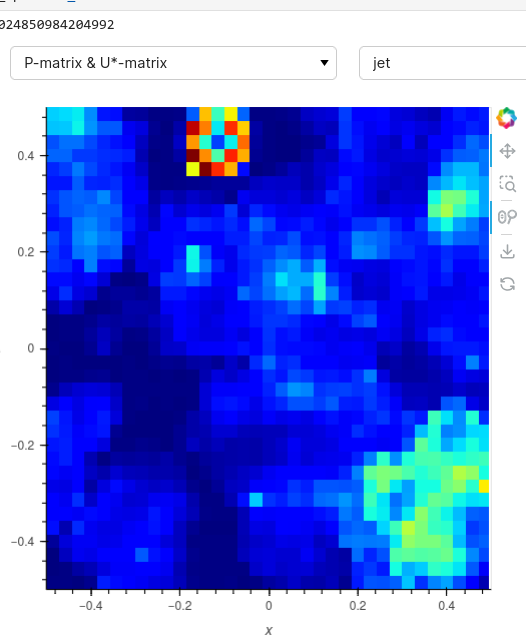
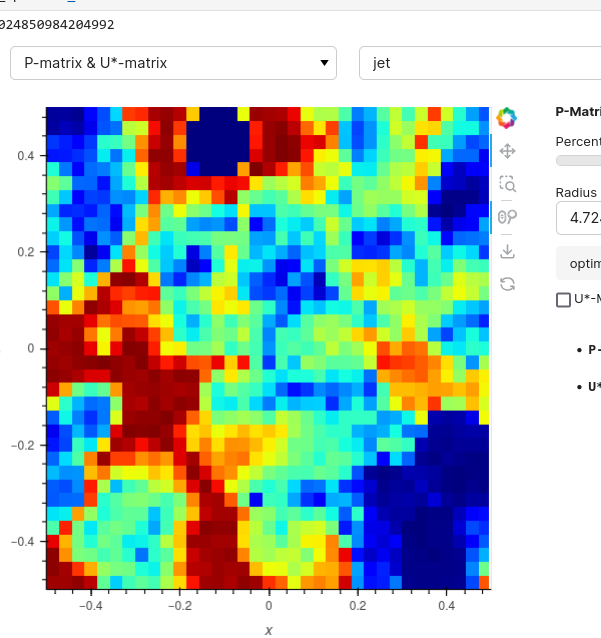
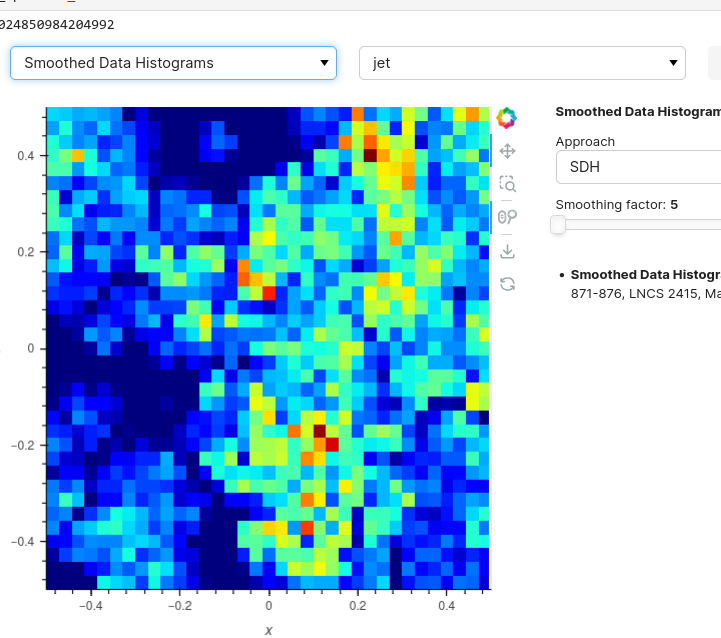
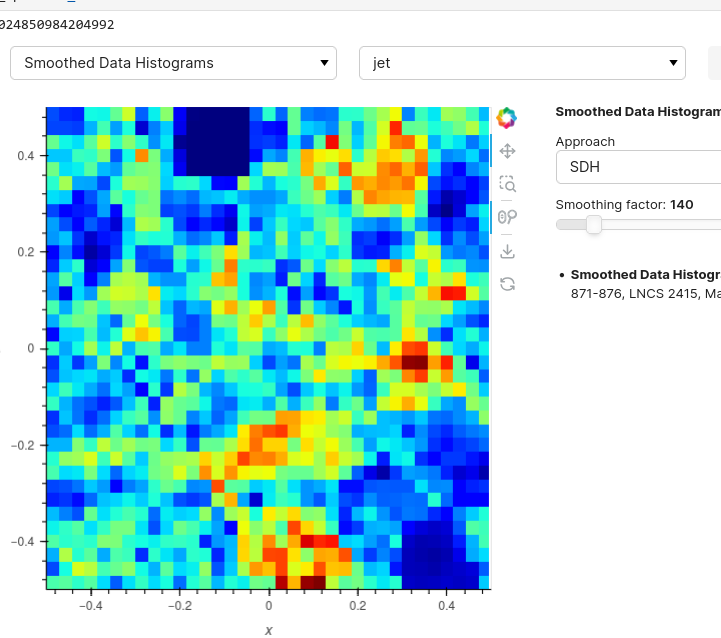
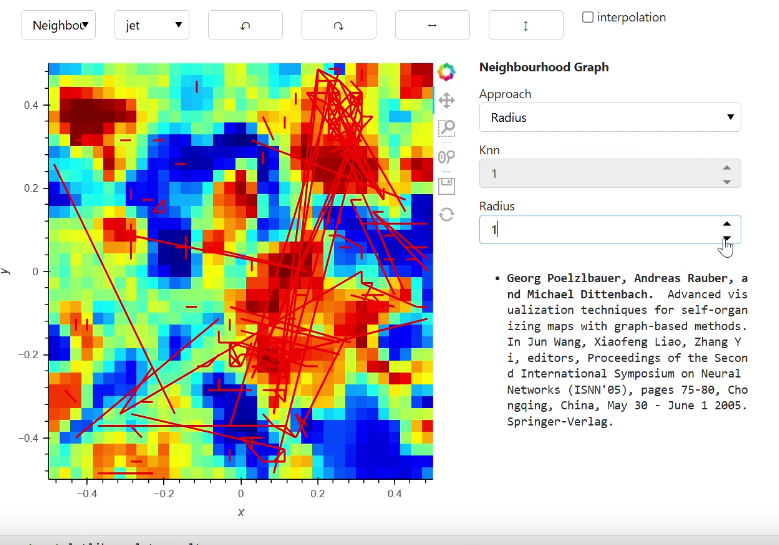
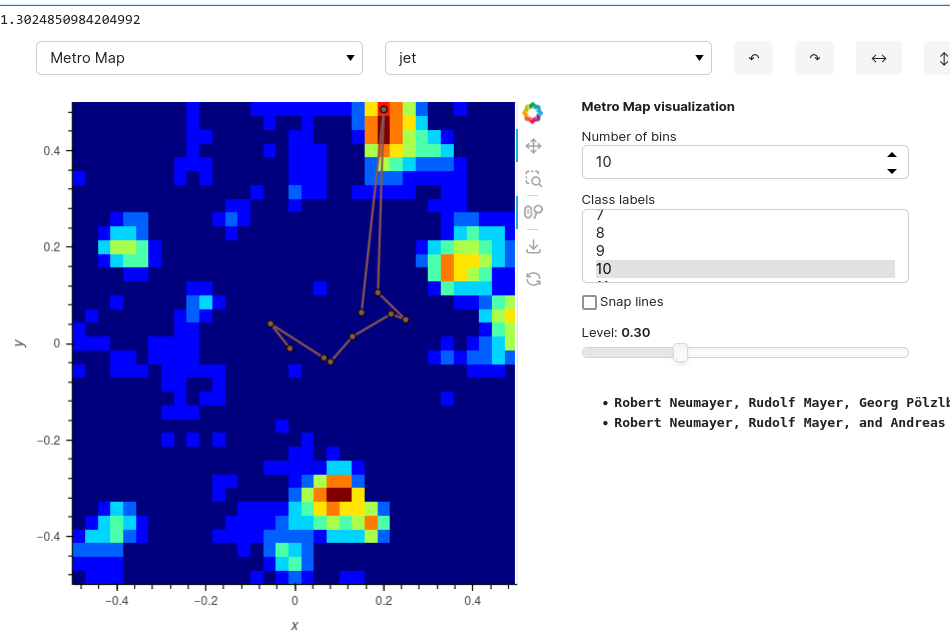
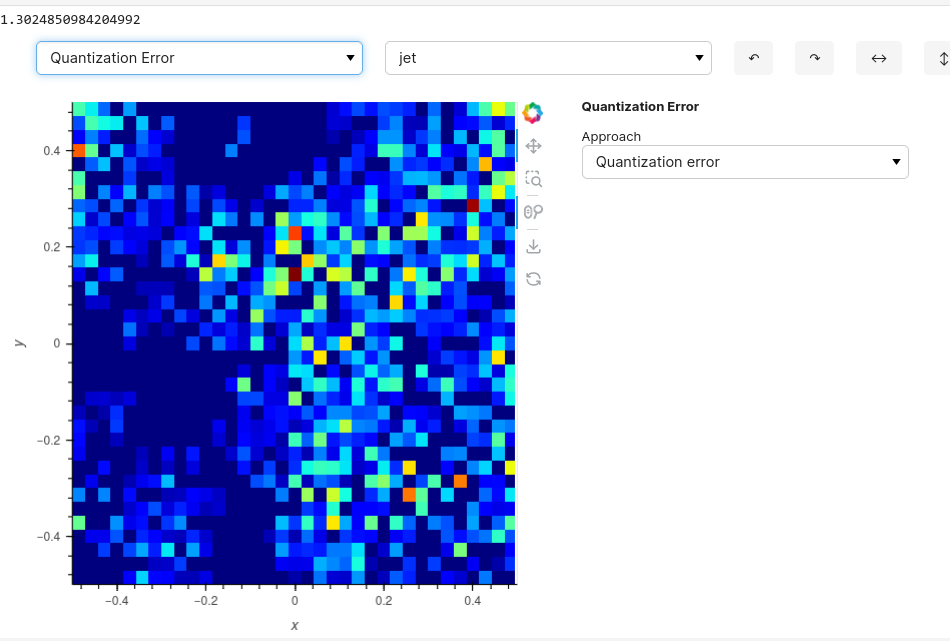
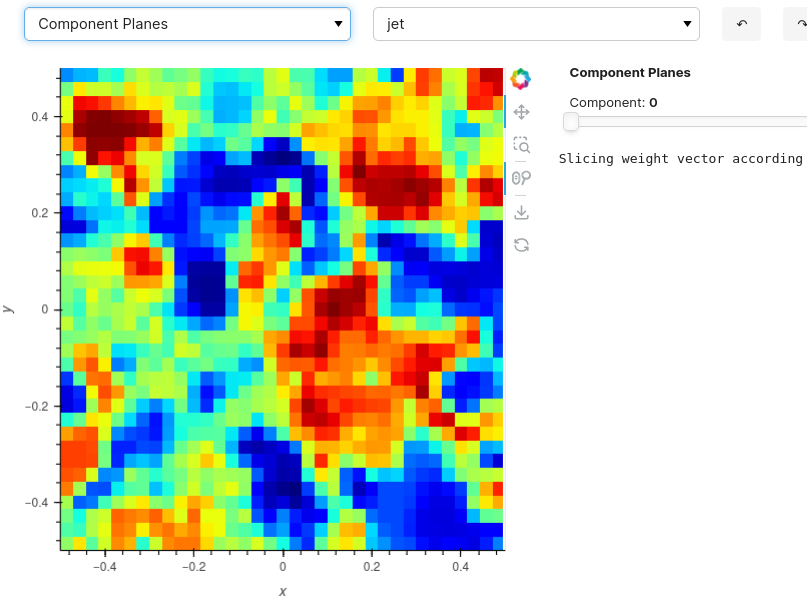
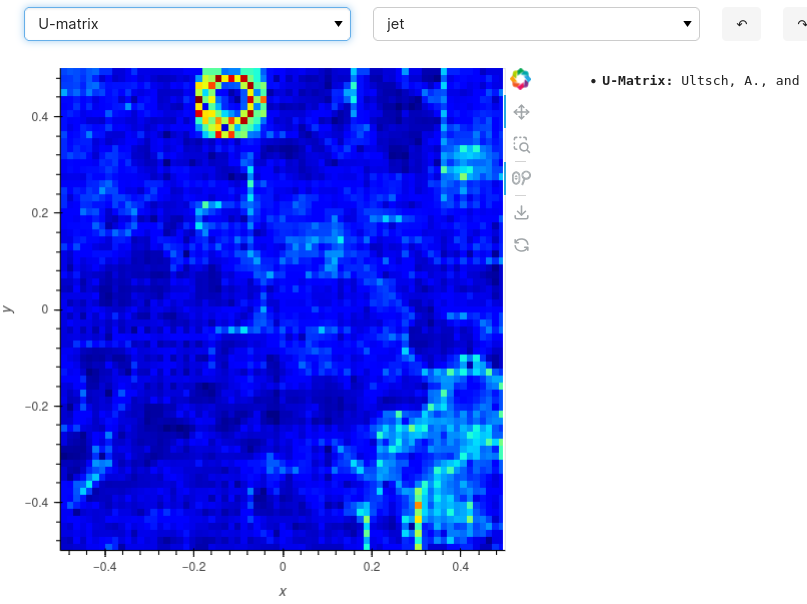
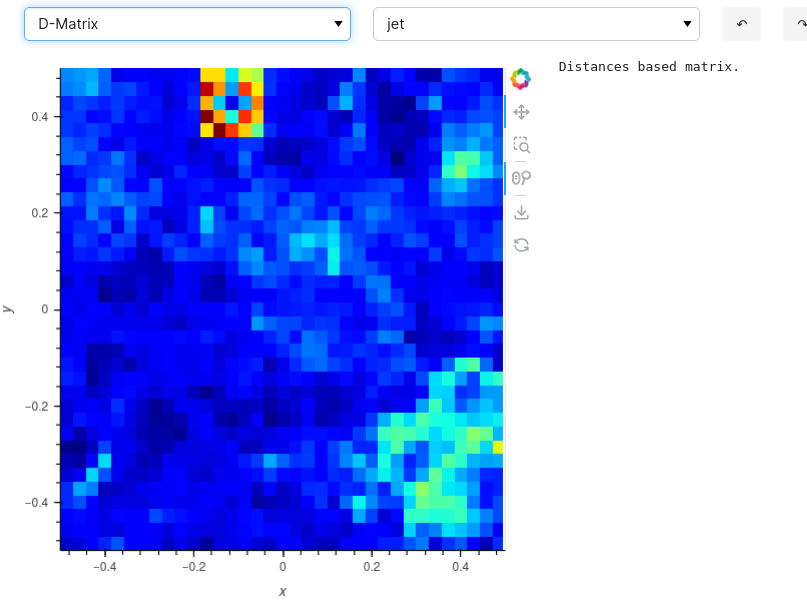
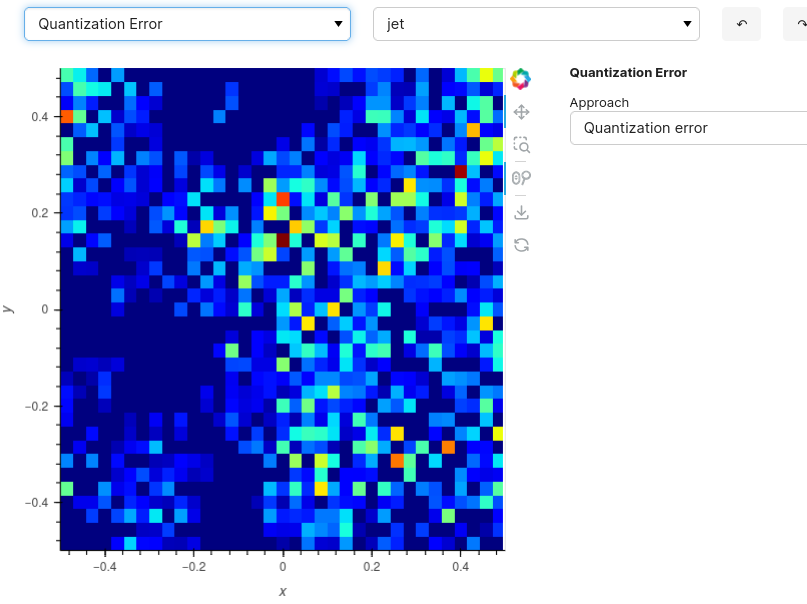
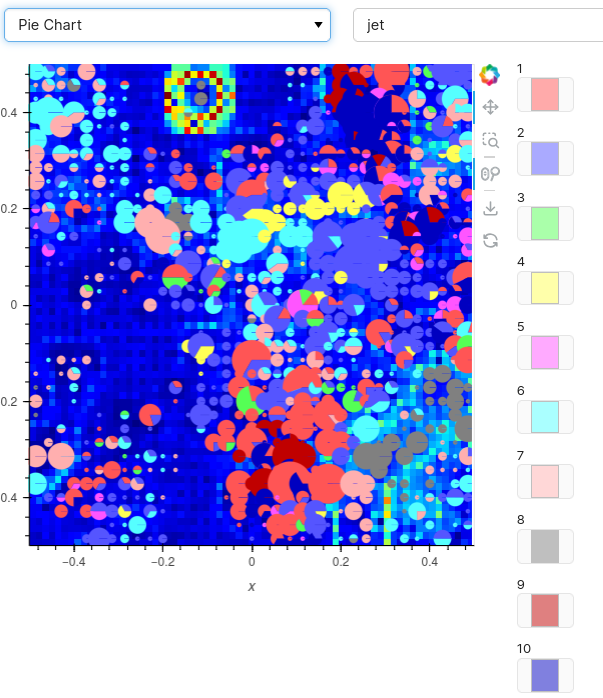

### SUBTASKS a-e

Provide a detailed interpretation of the cluster/class structures using a combination of<br>
visualizations and their parameter settings. Describe the findings in detail, specifically<br>
analyzing and providing rationale for

#### a 

Cluster densities / cardinalities, shapes: what can you tell about the cluster sizes<br>
shapes, their cardinalities and densities? Can you observe areas of higher/lower<br>
densities? Compare different visualizations that support (or contradict) your hypothesis<br>
and reason/explain why they do so.

In [38]:
#TODO above 

#### b

Hierarchical cluster relationships: can you detect any hierarchies in the data? How do<br>
they seem to be structured? Which clusters are similar, which are very distant, how<br>
could they be related? Compare different visualizations that support (or contradict)<br>
your hypothesis and reason/explain why they do so.

In [39]:
#TODO above

#### c

Topological relations / violations: in which areas can you observe topology violations?<br>
What types of violations do you observe in which areas of the map (i.e. actual violations<br>
due to bad training or the inherent structure of the data vs. cluster data that is mapped<br>
onto the plane). In how far do different visualizations agree on these violations?<br>
Compare different visualizations that support (or contradict) your hypothesis and<br>
reason/explain why they do so.

In [40]:
#TODO above

#### d 

Class distribution: Which classes are mapped onto which parts of the map? How do<br>
they relate to each other? In how far does the class distribution match the cluster<br>
structure? Which classes are well-separated, which ones less so? What might be the<br>
reason for these overlaps? Is the mapping less correct in these regions (e.g. higher<br>
error measures)? Are these areas well-separated. Which classes form homogeneous<br>
clusters, which form sub-clusters, how similar are these sub-clusters?

In [41]:
#TODO above

#### e

Quality of the map in terms of vector quantization and topology violation: is the quality<br>
homogeneous, are there certain areas or classes where the quality of the mapping is<br>
lower, others where it is higher?

In [42]:
#TODO above

# D) Summarize your findings



## 1

Summarize your overall findings and lessons learned:<br>
a. Which parameters have what kind of influence on the SOM?<br>
b. How sensitive is the setting of these parameters <br>
c. Which visualizations are most useful to reveal what kind of information? Which combination

WRITE SUMMARY

## 2

(optional) Provide feedback on the exercise in general: which parts were useful / less useful; which<br>
other kind of experiment would have been interesting, … (this section is, obviously, optional and will<br>
not be considered for grading. You may also decide to provide that kind of feedback anonymously via<br>
the feedback mechanism in TISS – in any case we would appreciate learning about it to adjust the<br>
exercises for next year.)

P